# Interpolation of data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
timeseries_folder = 'C:\\Users\\Vhaid\\OneDrive\\Desktop\\MS 274\\Projects\\Shorelinechanges'

# define a time step to use for the timeseries (daily or monthly)
time_step = 'daily'

# read in the SST timeseries
shoreline02_timeseries = np.genfromtxt(os.path.join(timeseries_folder,
                               'shoreline_transect_1602.csv'), delimiter=',', skip_header=1)

shoreline03_timeseries = np.genfromtxt(os.path.join(timeseries_folder,
                               'shoreline_transect_1603.csv'), delimiter=',', skip_header=1)

# read in the wave timeseries
waveheight_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'Averaged_wave_height.csv'),
                               delimiter=',', skip_header=1)

waveperiod_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'Averaged_wave_period.csv'),
                               delimiter=',', skip_header=1)

wavedirection_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'Averaged_wave_direction.csv'),
                               delimiter=',', skip_header=1)

# read in the wind timeseries
wind_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'wind_data.csv'),
                               delimiter=',', skip_header=1)

In [4]:
print(np.shape(shoreline02_timeseries))
print(np.shape(shoreline03_timeseries))
print(np.shape(waveheight_timeseries))
print(np.shape(waveperiod_timeseries))
print(np.shape(wavedirection_timeseries))
print(np.shape(wind_timeseries))

(108, 2)
(108, 2)
(107, 2)
(107, 2)
(107, 2)
(107, 2)


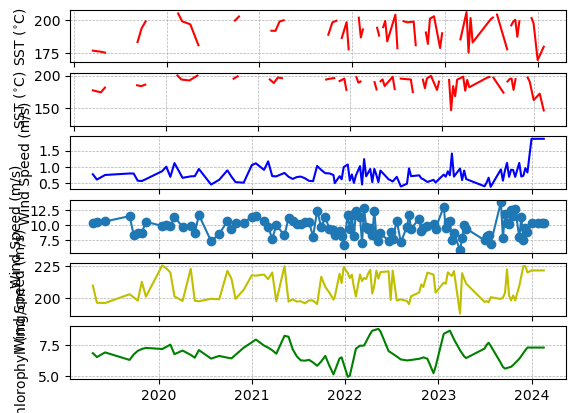

In [5]:
plt.subplot(6,1,1)
plt.plot(shoreline02_timeseries[:,0], shoreline02_timeseries[:,1], 'r-')
plt.ylabel('SST ($^{\circ}$C)')
plt.gca().set_xticklabels([])
plt.grid(linestyle='--',linewidth=0.5)

plt.subplot(6,1,2)
plt.plot(shoreline03_timeseries[:,0], shoreline03_timeseries[:,1], 'r-')
plt.ylabel('SST ($^{\circ}$C)')
plt.gca().set_xticklabels([])
plt.grid(linestyle='--',linewidth=0.5)

# make the subplot for the Wind timeseries
plt.subplot(6,1,3)
plt.plot(waveheight_timeseries[:,0], waveheight_timeseries[:,1], 'b-')
plt.ylabel('Wind Speed (m/s)')
plt.gca().set_xticklabels([])
plt.grid(linestyle='--',linewidth=0.5)

plt.subplot(6,1,4)
plt.plot(waveperiod_timeseries[:,0], waveperiod_timeseries[:,1], 'o-')
plt.ylabel('Wind Speed (m/s)')
plt.gca().set_xticklabels([])
plt.grid(linestyle='--',linewidth=0.5)

plt.subplot(6,1,5)
plt.plot(wavedirection_timeseries[:,0], wavedirection_timeseries[:,1], 'y-')
plt.ylabel('Wind Speed (m/s)')
plt.gca().set_xticklabels([])
plt.grid(linestyle='--',linewidth=0.5)

# make the subplot for the wind timeseries
plt.subplot(6,1,6)
plt.plot(wind_timeseries[:,0], wind_timeseries[:,1], 'g-')
plt.ylabel('Chlorophyll (mg/cm$^{3}$')
plt.grid(linestyle='--',linewidth=0.5)

# show the plot
plt.show()

In [6]:
common_time = shoreline02_timeseries[:,0]

# make an interpolation function for the wind data
# set a key word to deal with the 
set_int = interp1d(wind_timeseries[:,0], wind_timeseries[:,1], bounds_error=False,
                  fill_value=(wind_timeseries[0,1], wind_timeseries[-1,1]))

# interpolate the wind onto the sst timeseries
wind_speed_dense = set_int(common_time)

# make an interpolated wind timeseries
wind_speed_daily = np.column_stack([common_time, wind_speed_dense])

# make an interpolation function for the wave height data
set_int = interp1d(waveheight_timeseries[:,0], waveheight_timeseries[:,1], bounds_error=False,
                  fill_value=(waveheight_timeseries[0,1], waveheight_timeseries[-1,1]))

# interpolate the wave onto the shoreline timeseries
wave_period_dense = set_int(common_time)

# make an interpolated wave height timeseries
wave_daily = np.column_stack([common_time, wave_period_dense])

## make an interpolation function for the wave period data
set_int = interp1d(waveperiod_timeseries[:,0], waveperiod_timeseries[:,1], bounds_error=False,
                  fill_value=(waveperiod_timeseries[0,1], waveperiod_timeseries[-1,1]))

# interpolate the wind onto the sst timeseries
wave_period_dense = set_int(common_time)

# make an interpolated chl timeseries
wave_period_daily = np.column_stack([common_time, wave_period_dense])

# make an interpolation function for the wave direction data
set_int = interp1d(wavedirection_timeseries[:,0], wavedirection_timeseries[:,1], bounds_error=False,
                  fill_value=(wavedirection_timeseries[0,1], wavedirection_timeseries[-1,1]))

# interpolate the wind onto the sst timeseries
wave_direction_dense = set_int(common_time)

# make an interpolated chl timeseries
wave_direction_daily = np.column_stack([common_time, wave_direction_dense])

In [7]:
print(np.shape(wind_speed_daily))
print(np.shape(wave_daily))
print(np.shape(wave_period_daily))
print(np.shape(wave_direction_daily))

(108, 2)
(108, 2)
(108, 2)
(108, 2)


# Saving it incase I want to use it later

In [8]:
output_folder = ''

# output the interpolated wind file
np.savetxt(os.path.join(timeseries_folder, 'Averaged_wave_height.csv'),
           wave_daily, delimiter=',')

np.savetxt(os.path.join(timeseries_folder, 'Averaged_wave_period.csv'),
           wave_period_daily, delimiter=',')

np.savetxt(os.path.join(timeseries_folder, 'Averaged_wave_direction.csv'),
           wave_direction_daily, delimiter=',')

# output the interpolated chl file
np.savetxt(os.path.join(timeseries_folder, 'wind_data.csv'),
           wind_speed_daily, delimiter=',')

# Correlation with all the data

In [9]:
C = np.corrcoef(shoreline02_timeseries[:,1], wave_daily[:,1])
print(C)

[[nan nan]
 [nan  1.]]


In [10]:
# compute the indices where the NaNs occur
non_nan_indices = ~np.isnan(shoreline02_timeseries[:,1])

# subset each timeseries to the non-NaN indicies
shoreline02_subset = shoreline02_timeseries[non_nan_indices, 1]
shoreline03_subset = shoreline03_timeseries[non_nan_indices, 1]
waveh_subset = wave_daily[non_nan_indices, 1]
wavep_subset = wave_period_daily[non_nan_indices, 1]
waved_subset = wave_direction_daily[non_nan_indices, 1]
wind_subset = wind_speed_daily[non_nan_indices, 1]

In [11]:
# compute wave height with shoreline02 transect 
C = np.corrcoef(shoreline02_subset, waveh_subset)
print(C)
r_sh2_wh = C[0,1]

# compute wave period with shoreline02 transect 
C = np.corrcoef(shoreline02_subset, wavep_subset)
print(C)
r_sh2_wp = C[0,1]

# compute wave direction with shoreline02 transect 
C = np.corrcoef(shoreline02_subset, waved_subset)
print(C)
r_sh2_wd = C[0,1]

# compute wave direction with shoreline03 transect 
C = np.corrcoef(shoreline03_subset, waved_subset)
print(C)
r_sh3_wavd = C[0,1]

# compute wave height with shoreline03 transect 
C = np.corrcoef(shoreline03_subset, waveh_subset)
print(C)
r_sh3_wh = C[0,1]

# compute wave period with shoreline03 transect 
C = np.corrcoef(shoreline03_subset, wavep_subset)
print(C)
r_sh3_wp = C[0,1]

# compute the correlation with shoreline02 and wind
C = np.corrcoef(shoreline02_subset, wind_subset)
print(C)
r_sh2_w = C[0,1]

# compute the correlation with shoreline03 and wind
C = np.corrcoef(shoreline03_subset, wind_subset)
print(C)
r_sh3_w = C[0,1]

# compute the correlation of wind and wave height
C = np.corrcoef(wind_subset, waveh_subset)
print(C)
r_wh_w = C[0,1]

# compute the correlation of wind and wave period
C = np.corrcoef(wavep_subset, wind_subset)
print(C)
r_wp_w = C[0,1]

# compute the correlation of wind and wave direction
C = np.corrcoef(waved_subset, wind_subset)
print(C)
r_wd_w = C[0,1]

[[ 1.         -0.24273695]
 [-0.24273695  1.        ]]
[[ 1.         -0.21709385]
 [-0.21709385  1.        ]]
[[ 1.        -0.0499269]
 [-0.0499269  1.       ]]
[[1.        0.0639698]
 [0.0639698 1.       ]]
[[ 1.         -0.37502595]
 [-0.37502595  1.        ]]
[[ 1.         -0.22853927]
 [-0.22853927  1.        ]]
[[ 1.         -0.01011781]
 [-0.01011781  1.        ]]
[[ 1.         -0.05309794]
 [-0.05309794  1.        ]]
[[ 1.        -0.0068715]
 [-0.0068715  1.       ]]
[[ 1.         -0.37844496]
 [-0.37844496  1.        ]]
[[1.         0.22755608]
 [0.22755608 1.        ]]


In [12]:
# compute the line for shoreline02 and wave height
s02_waveh = np.polyfit(shoreline02_subset, waveh_subset, 1)
s02wh_estimate = s02_waveh[0]*shoreline02_subset + s02_waveh[1]

# compute the line for shoreline02 and wave period
s02_wavep = np.polyfit(shoreline02_subset, wavep_subset, 1)
s02wp_estimate = s02_wavep[0]*shoreline02_subset + s02_wavep[1]

# compute the line for shoreline02 and wave direction
s02_waved = np.polyfit(shoreline02_subset, waved_subset, 1)
s02wd_estimate = s02_waved[0]*shoreline02_subset + s02_waved[1]

# compute the line for shoreline02 and wind 
s02_wind = np.polyfit(shoreline02_subset, wind_subset, 1)
s02w_estimate = s02_wind[0]*shoreline02_subset + s02_wind[1]

# compute the line for shoreline03 and wave height
s03_waveh = np.polyfit(shoreline03_subset, waveh_subset, 1)
s03wh_estimate = s03_waveh[0]*shoreline03_subset + s03_waveh[1]

# compute the line for shoreline03 and wave period
s03_wavep = np.polyfit(shoreline03_subset, wavep_subset, 1)
s03wp_estimate = s03_wavep[0]*shoreline03_subset + s03_wavep[1]

# compute the line for shoreline03 and wave direction
s03_waved = np.polyfit(shoreline03_subset, waved_subset, 1)
s03wd_estimate = s03_waved[0]*shoreline03_subset + s03_waved[1]

# compute the line for shoreline03 and wind
s03_wind = np.polyfit(shoreline03_subset, wind_subset, 1)
s03w_estimate = s03_wind[0]*shoreline03_subset + s03_wind[1]

# compute the line for wind and wave height 
wind_waveh = np.polyfit(wind_subset, waveh_subset, 1)
wwh_estimate = wind_waveh[0]*wind_subset + wind_waveh[1]

# compute the line for wind and wave period 
wind_wavep = np.polyfit(wind_subset, wavep_subset, 1)
wwp_estimate = wind_wavep[0]*wind_subset + wind_wavep[1]

# compute the line for wind and wave direction 
wind_waved = np.polyfit(wind_subset, waved_subset, 1)
wwd_estimate = wind_waved[0]*wind_subset + wind_waved[1]

# Wind Correlations

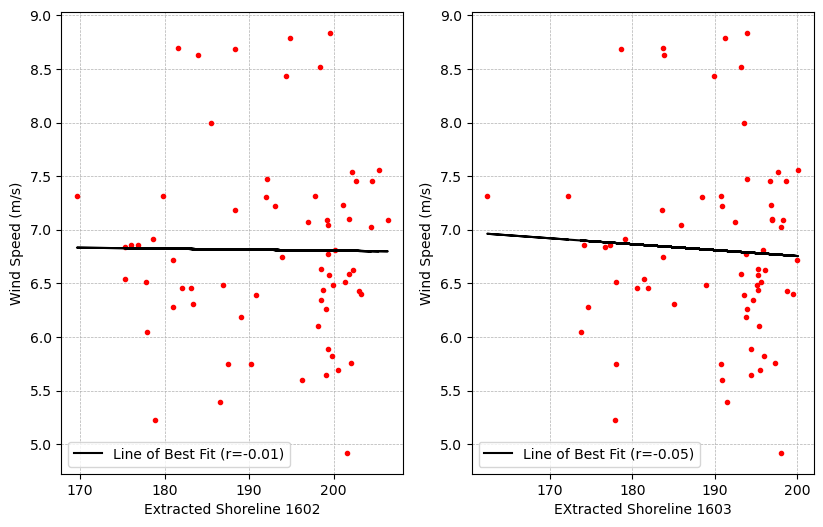

In [13]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.plot(shoreline02_subset, wind_subset, 'r.')
plt.plot(shoreline02_subset, s02w_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh2_w)+')')
plt.xlabel('Extracted Shoreline 1602')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()

plt.subplot(1,3,2)
plt.plot(shoreline03_subset, wind_subset, 'r.')
plt.plot(shoreline03_subset, s03w_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh3_w)+')')
plt.xlabel('EXtracted Shoreline 1603')
plt.ylabel('Wind Speed (m/s)')
# plt.gca().set_yticklabels([])
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()

Text(0.5, 1.0, 'Wind Speed vs Wave Height')

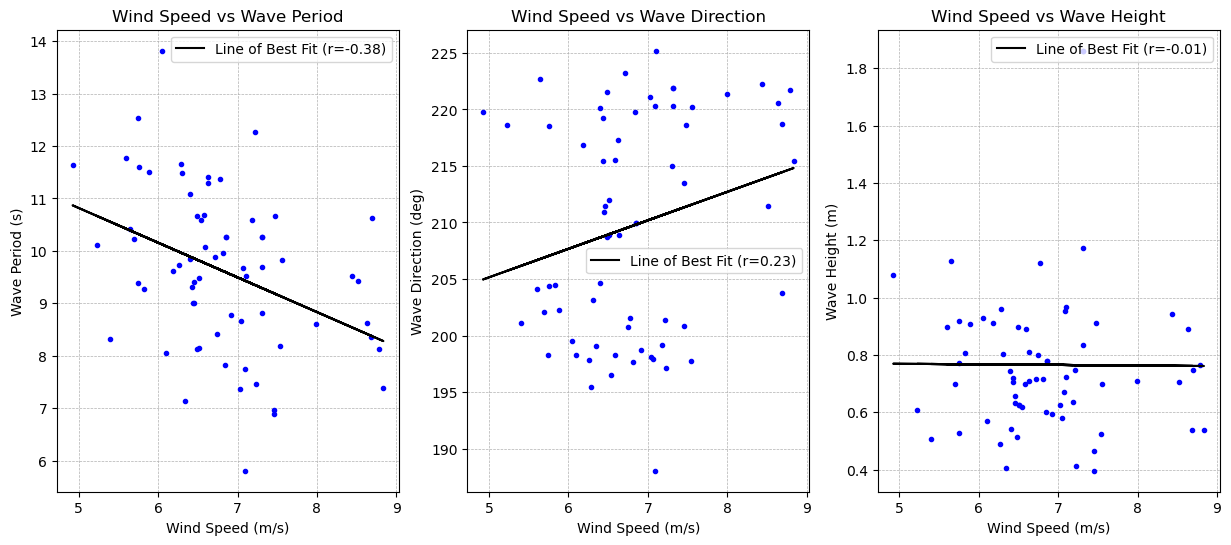

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.plot(wind_subset, wavep_subset, 'b.')
plt.plot(wind_subset, wwp_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_wp_w)+')')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wave Period (s)')
# plt.gca().set_yticklabels([])
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Wind Speed vs Wave Period')

plt.subplot(1,3,2)
plt.plot(wind_subset, waved_subset, 'b.')
plt.plot(wind_subset, wwd_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_wd_w)+')')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wave Direction (deg)')
# plt.gca().set_yticklabels([])
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Wind Speed vs Wave Direction')

plt.subplot(1,3,3)
plt.plot(wind_subset, waveh_subset, 'b.')
plt.plot(wind_subset, wwh_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_wh_w)+')')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wave Height (m)')
# plt.gca().set_yticklabels([])
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Wind Speed vs Wave Height')

# Shoreline 1602 vs Wave correlation 

Text(0.5, 1.0, 'Transect 1602 vs Wave Direction')

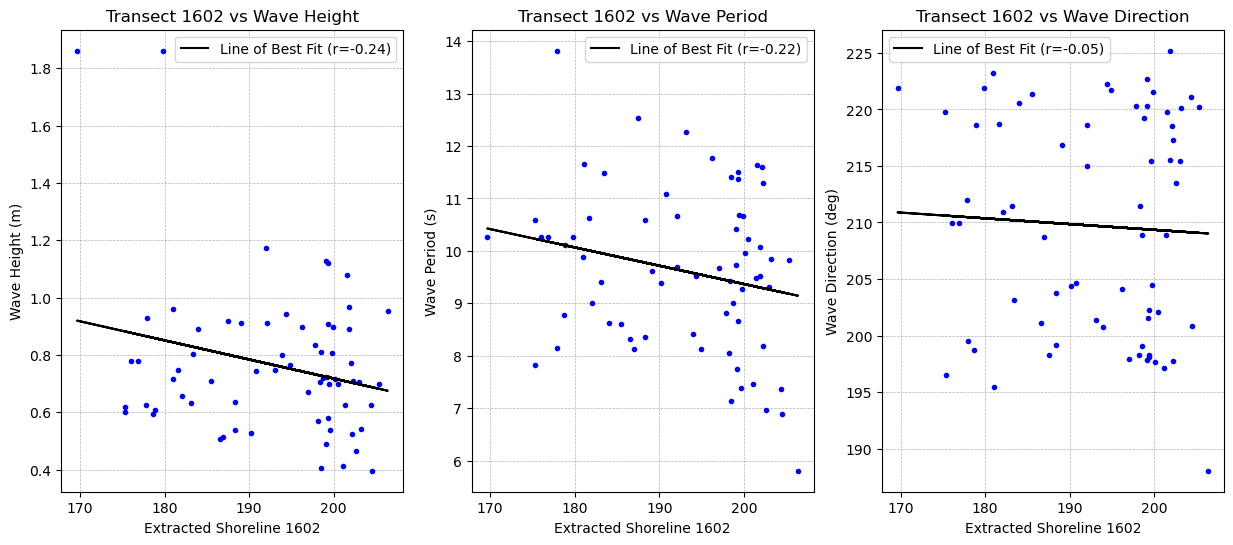

In [22]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.plot(shoreline02_subset, waveh_subset, 'b.')
plt.plot(shoreline02_subset, s02wh_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh2_wh)+')')
plt.xlabel('Extracted Shoreline 1602')
plt.ylabel('Wave Height (m)')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Transect 1602 vs Wave Height')

plt.subplot(1,3,2)
plt.plot(shoreline02_subset, wavep_subset, 'b.')
plt.plot(shoreline02_subset, s02wp_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh2_wp)+')')
plt.xlabel('Extracted Shoreline 1602')
plt.ylabel('Wave Period (s)')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Transect 1602 vs Wave Period')

plt.subplot(1,3,3)
plt.plot(shoreline02_subset, waved_subset, 'b.')
plt.plot(shoreline02_subset, s02wd_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh2_wd)+')')
plt.xlabel('Extracted Shoreline 1602')
plt.ylabel('Wave Direction (deg)')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Transect 1602 vs Wave Direction')

Text(0.5, 1.0, 'Transect 1603 vs Wave Direction')

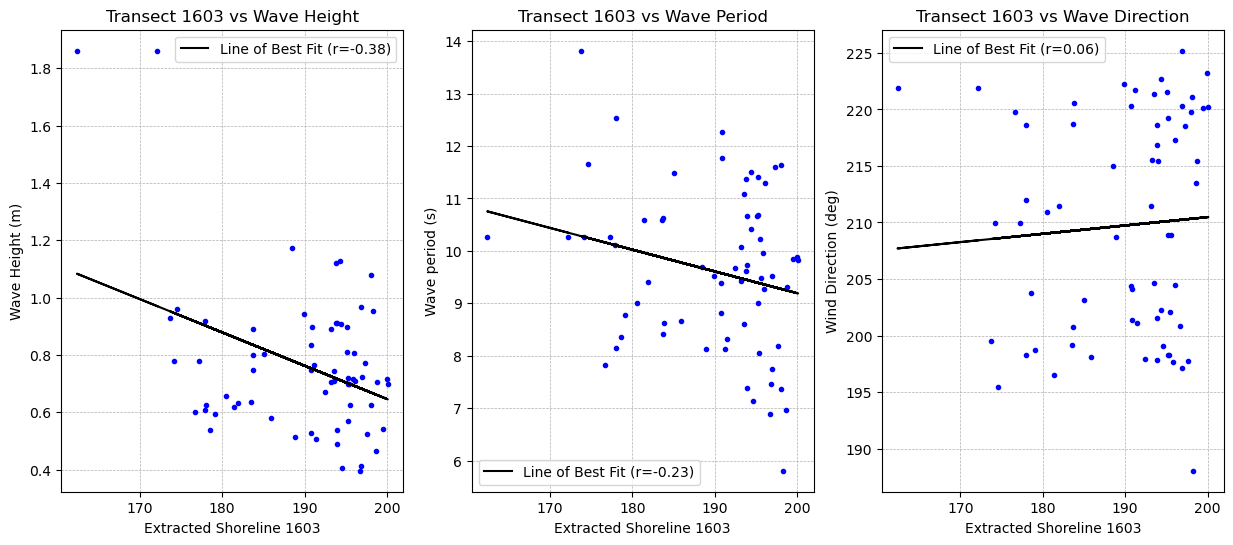

In [23]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.plot(shoreline03_subset, waveh_subset, 'b.')
plt.plot(shoreline03_subset, s03wh_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh3_wh)+')')
plt.xlabel('Extracted Shoreline 1603')
plt.ylabel('Wave Height (m)')
#plt.gca().set_yticklabels([])
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Transect 1603 vs Wave Height')

plt.subplot(1,3,2)
plt.plot(shoreline03_subset, wavep_subset, 'b.')
plt.plot(shoreline03_subset, s03wp_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh3_wp)+')')
plt.xlabel('Extracted Shoreline 1603')
plt.ylabel('Wave period (s)')
#plt.gca().set_yticklabels([])
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Transect 1603 vs Wave Period')

plt.subplot(1,3,3)
plt.plot(shoreline03_subset, waved_subset, 'b.')
plt.plot(shoreline03_subset, s03wd_estimate, 'k-', label='Line of Best Fit (r='+'{:.2f}'.format(r_sh3_wavd)+')' )
plt.xlabel('Extracted Shoreline 1603')
plt.ylabel('Wind Direction (deg)')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.title('Transect 1603 vs Wave Direction')